## Setup and Imports

In [7]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Add scripts directory to path
sys.path.append('../scripts')

# Import our data populator
from data_populator import RangeDataPopulator

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


## Initialize Data Populator

In [8]:
# Initialize with 100 samples per row
populator = RangeDataPopulator(num_samples_per_row=100)
print("Data populator initialized with 100 samples per row")

Data populator initialized with 100 samples per row


In [10]:
 # Initialize with 100 samples per row
populator = RangeDataPopulator(num_samples_per_row=100)
print(" Data populator initialized with 100 samples per row")

 Data populator initialized with 100 samples per row


## Load Original Data

In [11]:
# Load the original data
original_df = populator.load_data('../data/raw/Cereal_crops.csv')

# Display basic info
print("="*60)
print(" ORIGINAL DATA INFORMATION")
print("="*60)
print(f" Shape: {original_df.shape} (rows × columns)")
print(f" Memory usage: {original_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  Column Names: {len(original_df.columns)} columns")

# Display data types
print("\n Data Types:")
print(original_df.dtypes.value_counts())

print("\n First 5 rows:")
display(original_df.head())

print("\n Missing values per column:")
missing_values = original_df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values!")

INFO:data_populator:Loading data from ../data/raw/Cereal_crops.csv
INFO:data_populator:Loaded 288 rows with 12 columns


 ORIGINAL DATA INFORMATION
 Shape: (288, 12) (rows × columns)
 Memory usage: 0.05 MB
  Column Names: 12 columns

 Data Types:
str      11
int64     1
Name: count, dtype: int64

 First 5 rows:


,No.,N (kg/ha),P (kg/ha),K (kg/ha),T (°C),PH,RF (mm),Altitude (m),LGP,Crop Type,Crop Species,Yield (q/ha)
0,1,69 - 92,Oct-30,15 - 30,Oct-27,5.5 - 7.0,730-1300,1750-2500,98-112,Teff,Acc 236756-3 (Bir Adama),16-18
1,2,69 - 92,Oct-30,15 - 30,Oct-27,5.5 - 7.0,700-1300,1700-2600,104-128,Teff,DZ-Cr-551 RIL173 (Bereket),2.0-2.7
2,3,69 - 92,Oct-30,15 - 30,Oct-27,5.5 - 7.0,700-1300,1700-2600,115-130,Teff,DZ-Cr-542 RIL106 (Kulie),2.0-2.3
3,4,69 - 92,Oct-30,15 - 30,Oct-27,5.5 - 7.0,1800-200,1750-2250,111-128,Teff,DZ-Cr-456 RIL76B (Jarso),2.3
4,5,69 - 92,Oct-30,15 - 30,Oct-27,5.5 - 7.0,800-1300,1700-2400,93-113,Teff,DZ-Cr-459 RIL 104 (Takusa),17-21



 Missing values per column:
No missing values!


## Generate Populated Data

In [13]:
# Generate populated data
populated_df = populator.generate_synthetic_data()

# Display basic info
print("="*60)
print(" POPULATED DATA INFORMATION")
print("="*60)
print(f" Shape: {populated_df.shape} (rows × columns)")
print(f" Expansion factor: {len(populated_df)/len(original_df):.0f}x")
print(f" Memory usage: {populated_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n First 5 rows of populated data:")
display(populated_df.head())

print("\n Missing values per column in populated data:")
missing_populated = populated_df.isnull().sum()
print(missing_populated[missing_populated > 0] if missing_populated.sum() > 0 else "No missing values!")

INFO:data_populator:Generating 100 samples per row...
INFO:data_populator:Processing row 1/288
INFO:data_populator:Processing row 11/288
INFO:data_populator:Processing row 21/288
INFO:data_populator:Processing row 31/288
INFO:data_populator:Processing row 41/288
INFO:data_populator:Processing row 51/288
INFO:data_populator:Processing row 61/288
INFO:data_populator:Processing row 71/288
INFO:data_populator:Processing row 81/288
INFO:data_populator:Processing row 91/288
INFO:data_populator:Processing row 101/288
INFO:data_populator:Processing row 111/288
INFO:data_populator:Processing row 121/288
INFO:data_populator:Processing row 131/288
INFO:data_populator:Processing row 141/288
INFO:data_populator:Processing row 151/288
INFO:data_populator:Processing row 161/288
INFO:data_populator:Processing row 171/288
INFO:data_populator:Processing row 181/288
INFO:data_populator:Processing row 191/288
INFO:data_populator:Processing row 201/288
INFO:data_populator:Processing row 211/288
INFO:data_p

 POPULATED DATA INFORMATION
 Shape: (28800, 12) (rows × columns)
 Expansion factor: 100x
 Memory usage: 6.26 MB

 First 5 rows of populated data:


,No.,N (kg/ha),P (kg/ha),K (kg/ha),T (°C),PH,RF (mm),Altitude (m),LGP,Crop Type,Crop Species,Yield (q/ha)
0,1.0,87.514043,Oct-30,27.713966,Oct-27,6.768862,924.728572,1935.985352,98.088237,Teff,Acc 236756-3 (Bir Adama),17.494153
1,1.0,75.199535,Oct-30,17.086408,Oct-27,6.306465,828.028941,2338.372184,110.116135,Teff,Acc 236756-3 (Bir Adama),16.065383
2,1.0,86.902080,Oct-30,15.035304,Oct-27,5.589615,1171.882895,1834.798554,106.396583,Teff,Acc 236756-3 (Bir Adama),16.426922
3,1.0,70.139463,Oct-30,22.776158,Oct-27,6.224928,762.065388,2440.940638,100.330736,Teff,Acc 236756-3 (Bir Adama),17.189884
4,1.0,82.933421,Oct-30,15.938246,Oct-27,6.304226,1281.366862,2149.053513,110.637093,Teff,Acc 236756-3 (Bir Adama),16.146561



 Missing values per column in populated data:
No missing values!


## Basic Statistics and Generation Summary

In [15]:
# Get generation statistics
stats = populator.get_statistics()
print("="*60)
print(" GENERATION STATISTICS")
print("="*60)
for key, value in stats.items():
    if key not in ['columns']:
        if key == 'generation_ratio':
            print(f"   {key.replace('_', ' ').title()}: {value:.1f}x")
        else:
            print(f"   {key.replace('_', ' ').title()}: {value}")

print("\n Unique values in populated data:")
print(f" Crop Types: {populated_df['Crop Type'].nunique()}")
print(f" Crop Species: {populated_df['Crop Species'].nunique()}")

 GENERATION STATISTICS
   Original Rows: 288
   Synthetic Rows: 28800
   Samples Per Row: 100
   Generation Ratio: 100.0x

 Unique values in populated data:
 Crop Types: 5
 Crop Species: 276


## Enhanced Comparison Plotting Function

In [17]:
def enhanced_comparison_plot(original_df, populated_df, col_name, num_bins=30):
    """
    Enhanced comparison plot with statistics
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Original data (midpoints of ranges)
    original_values = []
    for val in original_df[col_name].dropna():
        extracted = populator.extract_range_or_value(val)
        if isinstance(extracted, tuple):
            original_values.append(np.mean(extracted))
        elif isinstance(extracted, (int, float)):
            original_values.append(extracted)
    
    if original_values:
        axes[0].hist(original_values, bins=num_bins, alpha=0.7, color='skyblue', edgecolor='black', density=True)
        axes[0].axvline(np.mean(original_values), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(original_values):.2f}')
        axes[0].set_title(f'Original {col_name}\n(Range Midpoints)', fontsize=14, fontweight='bold')
        axes[0].set_xlabel(col_name)
        axes[0].set_ylabel('Density')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
    
    # 2. Populated data
    populated_vals = populated_df[col_name].dropna()
    axes[1].hist(populated_vals, bins=num_bins, alpha=0.7, color='lightgreen', edgecolor='black', density=True)
    axes[1].axvline(populated_vals.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {populated_vals.mean():.2f}')
    axes[1].axvline(populated_vals.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {populated_vals.median():.2f}')
    axes[1].set_title(f'Populated {col_name}', fontsize=14, fontweight='bold')
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel('Density')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # 3. Box plot comparison
    data_to_plot = []
    labels = []
    if original_values:
        data_to_plot.append(original_values)
        labels.append('Original\n(Midpoints)')
    
    data_to_plot.append(populated_vals)
    labels.append('Populated')
    
    bp = axes[2].boxplot(data_to_plot, labels=labels, patch_artist=True)
    bp['boxes'][0].set_facecolor('skyblue') if original_values else None
    bp['boxes'][1 if original_values else 0].set_facecolor('lightgreen')
    axes[2].set_title(f'Distribution Comparison\n{col_name}', fontsize=14, fontweight='bold')
    axes[2].set_ylabel(col_name)
    axes[2].grid(True, alpha=0.3)
    
    plt.suptitle(f'Analysis of {col_name}', fontsize=16, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n📊 Statistics for {col_name}:")
    print("-" * 40)
    if original_values:
        print(f"Original (midpoints): Mean = {np.mean(original_values):.2f}, Std = {np.std(original_values):.2f}, Range = {min(original_values):.2f}-{max(original_values):.2f}")
    print(f"Populated: Mean = {populated_vals.mean():.2f}, Std = {populated_vals.std():.2f}, Range = {populated_vals.min():.2f}-{populated_vals.max():.2f}")
    print(f"Populated variance: {populated_vals.var():.2f}")
    print("-" * 40)

## Analyze Key Agricultural Variables

🌱 ANALYSIS OF KEY AGRICULTURAL VARIABLES

1. Analyzing Yield (q/ha)...


TypeError: '<=' not supported between instances of 'float' and 'str'

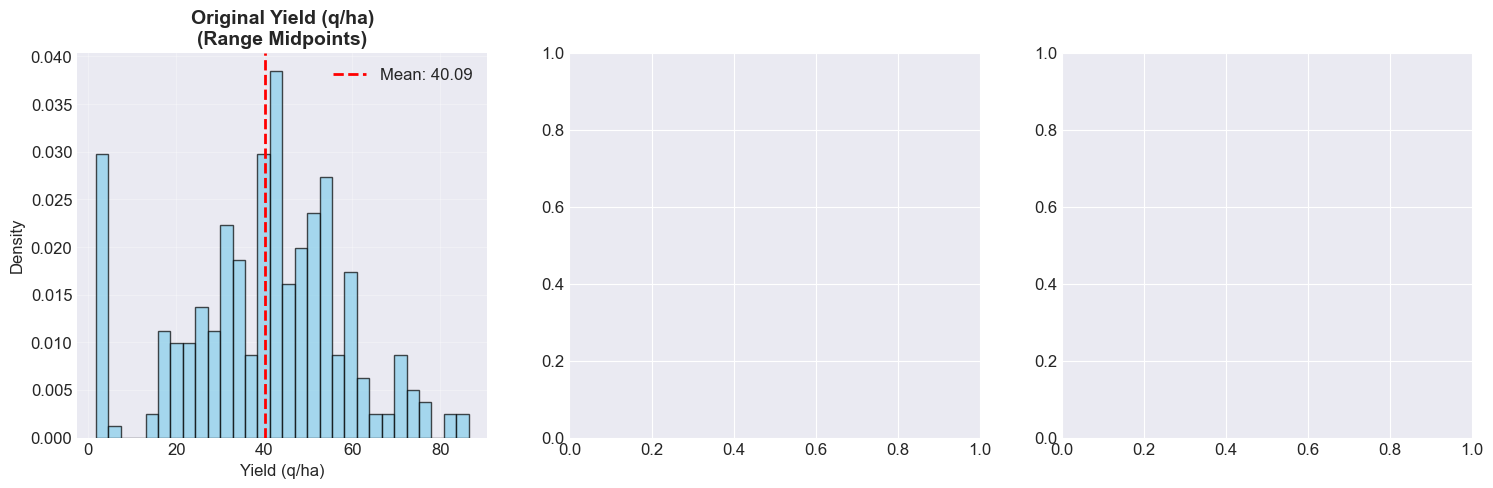

In [18]:
# Define key agricultural variables to analyze
key_variables = [
    'Yield (q/ha)', 
    'Altitude (m)', 
    'RF (mm)', 
    'T (°C)',
    'N (kg/ha)',
    'P (kg/ha)',
    'K (kg/ha)',
    'PH',
    'LGP'
]

print("="*60)
print("🌱 ANALYSIS OF KEY AGRICULTURAL VARIABLES")
print("="*60)

# Analyze each variable
for idx, col in enumerate(key_variables):
    if col in original_df.columns:
        print(f"\n{idx+1}. Analyzing {col}...")
        enhanced_comparison_plot(original_df, populated_df, col)
        print("\n" + "="*60)

## Comprehensive Crop Analysis

 COMPREHENSIVE CROP ANALYSIS

 Crop Type Distribution:
Crop Type
Wheat      9500
Sorghum    5400
Maize      5100
Barley     4500
Teff       4300
Name: count, dtype: int64


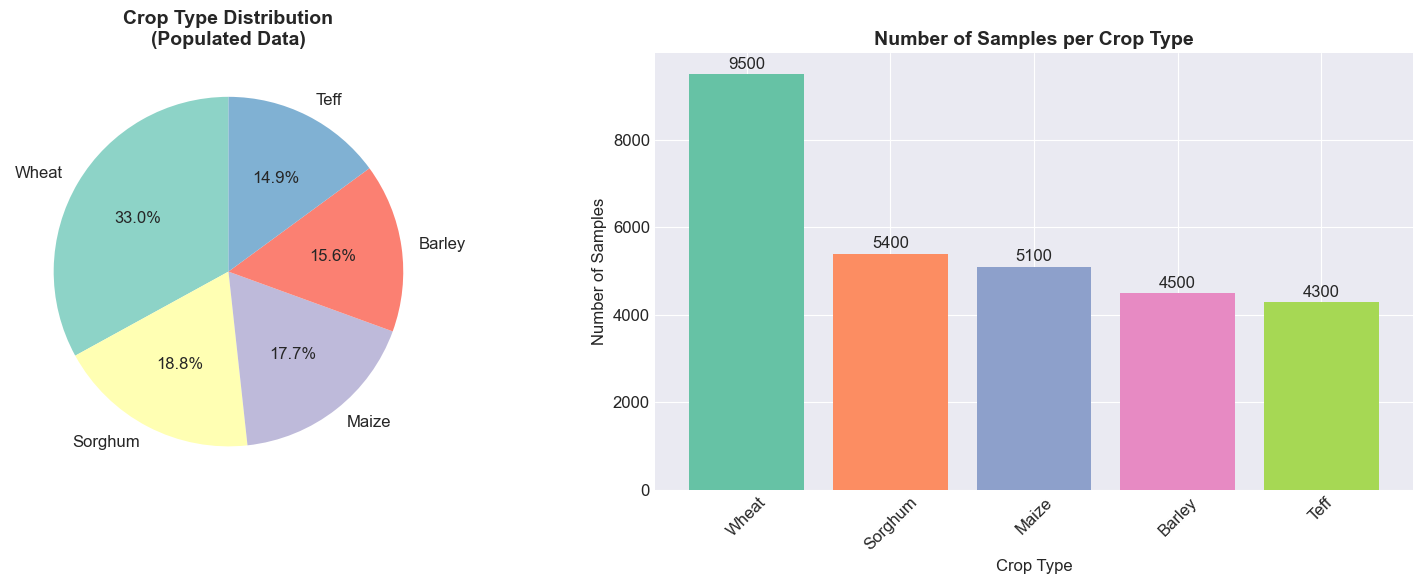


 Yield Statistics by Crop Type:


TypeError: agg function failed [how->mean,dtype->object]

In [22]:
print("="*60)
print(" COMPREHENSIVE CROP ANALYSIS")
print("="*60)

# Crop type distribution
print("\n Crop Type Distribution:")
crop_dist = populated_df['Crop Type'].value_counts()
print(crop_dist)

# Visualize crop distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
axes[0].pie(crop_dist.values, labels=crop_dist.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette("Set3"))
axes[0].set_title('Crop Type Distribution\n(Populated Data)', fontsize=14, fontweight='bold')

# Bar chart
bars = axes[1].bar(crop_dist.index, crop_dist.values, color=sns.color_palette("Set2"))
axes[1].set_title('Number of Samples per Crop Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Crop Type')
axes[1].set_ylabel('Number of Samples')
axes[1].tick_params(axis='x', rotation=45)
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 50,
                f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Yield analysis by crop type
print("\n Yield Statistics by Crop Type:")
yield_by_crop = populated_df.groupby('Crop Type')['Yield (q/ha)'].agg(['mean', 'std', 'min', 'max', 'count'])
print(yield_by_crop.round(2))

# Enhanced boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(data=populated_df, x='Crop Type', y='Yield (q/ha)', palette='Set2')
plt.title('Yield Distribution by Crop Type\n(Populated Data)', fontsize=16, fontweight='bold')
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('Yield (q/ha)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Correlation and Relationship Analysis

🔗 CORRELATION AND RELATIONSHIP ANALYSIS


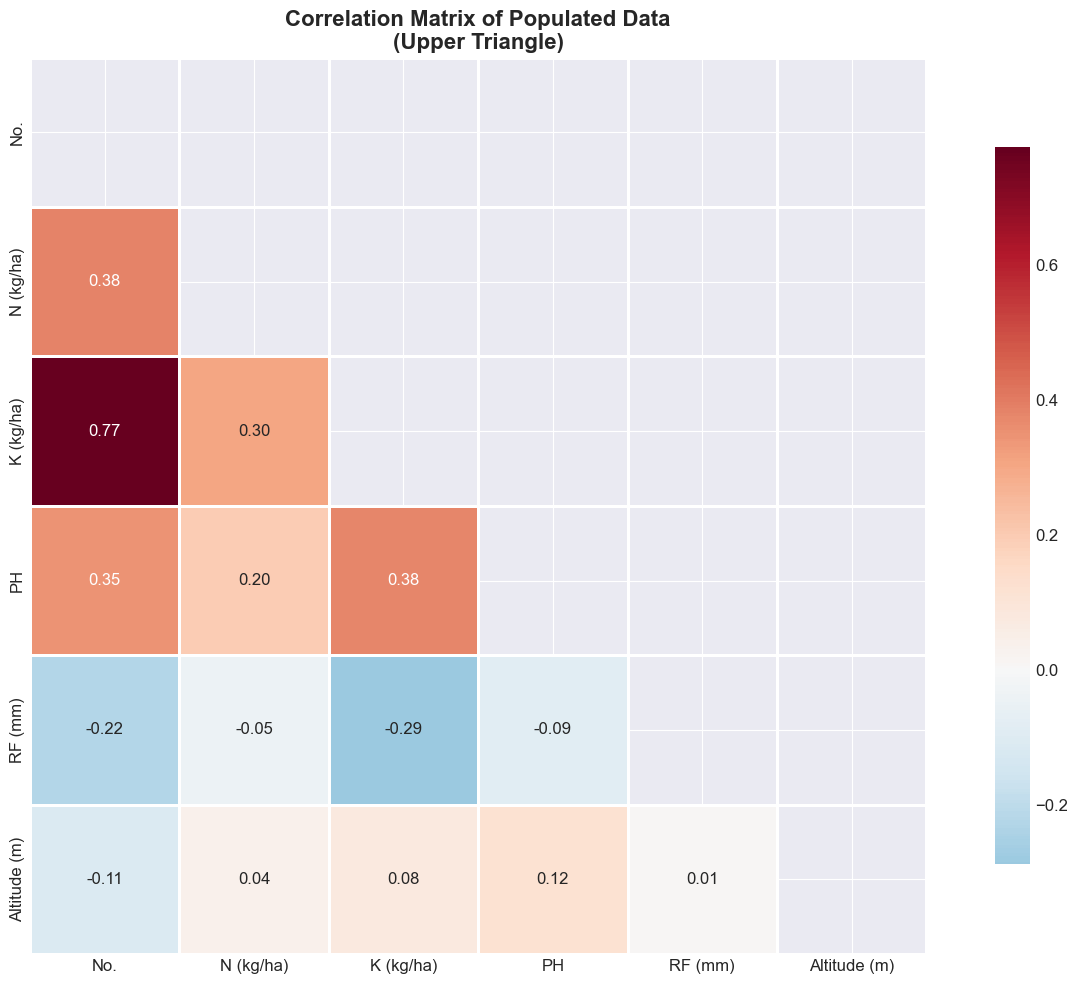


🔝 Top 10 Strongest Correlations:
        Var1         Var2  Correlation
         No.    K (kg/ha)     0.774838
   N (kg/ha)          No.     0.383770
          PH    K (kg/ha)     0.378054
         No.           PH     0.346426
   N (kg/ha)    K (kg/ha)     0.304537
   K (kg/ha)      RF (mm)    -0.287907
     RF (mm)          No.    -0.222300
   N (kg/ha)           PH     0.201621
          PH Altitude (m)     0.115819
Altitude (m)          No.    -0.113493

📈 Scatter plots for top correlated pairs:


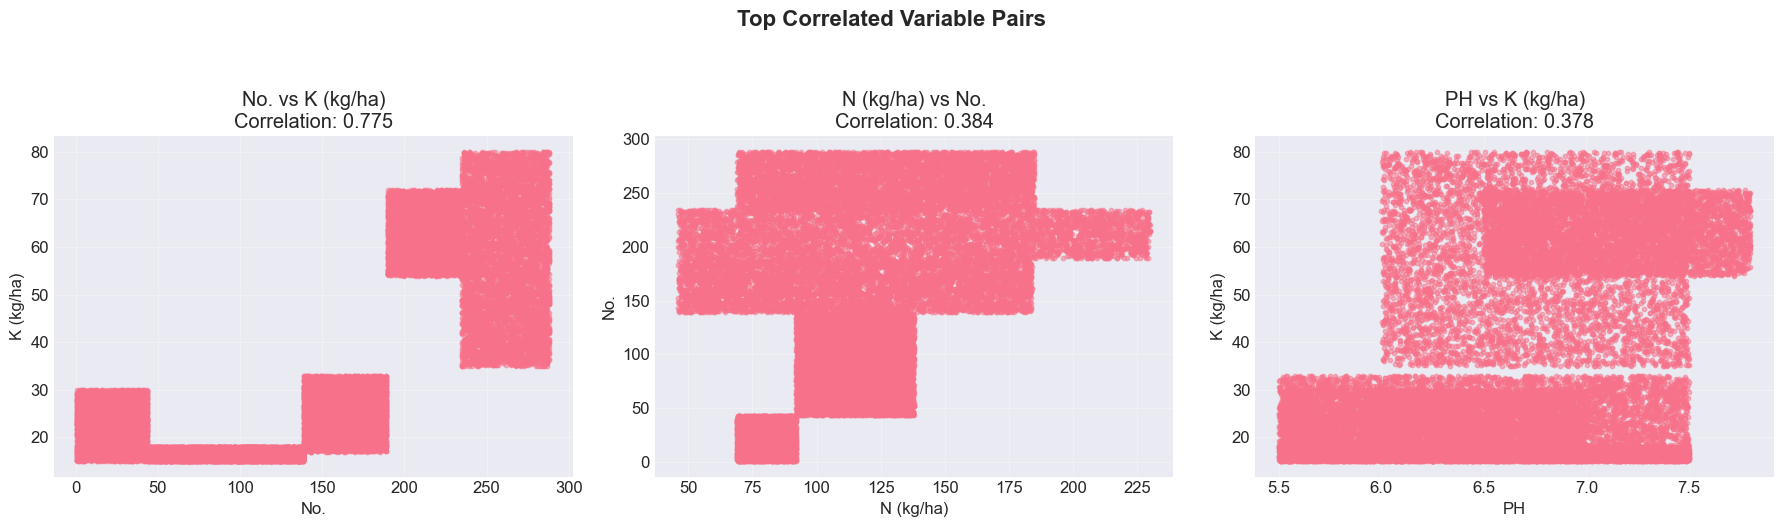

In [24]:
print("="*60)
print("🔗 CORRELATION AND RELATIONSHIP ANALYSIS")
print("="*60)

# Select numeric columns
numeric_columns = populated_df.select_dtypes(include=[np.number]).columns

if len(numeric_columns) > 0:
    # Correlation matrix
    corr_matrix = populated_df[numeric_columns].corr()
    
    # Plot heatmap
    plt.figure(figsize=(14, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Populated Data\n(Upper Triangle)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Find strongest correlations
    print("\n🔝 Top 10 Strongest Correlations:")
    corr_pairs = corr_matrix.unstack()
    sorted_pairs = corr_pairs.sort_values(kind="quicksort", key=abs, ascending=False)
    
    # Remove self-correlations and duplicates
    unique_pairs = pd.DataFrame(sorted_pairs).reset_index()
    unique_pairs.columns = ['Var1', 'Var2', 'Correlation']
    unique_pairs = unique_pairs[unique_pairs['Var1'] != unique_pairs['Var2']]
    unique_pairs = unique_pairs.iloc[::2]  # Take every other to avoid duplicates
    
    print(unique_pairs.head(10).to_string(index=False))
    
    # Scatter plots for top correlated pairs
    print("\n📈 Scatter plots for top correlated pairs:")
    top_pairs = unique_pairs.head(3).values
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, (var1, var2, corr) in enumerate(top_pairs):
        axes[idx].scatter(populated_df[var1], populated_df[var2], alpha=0.5, s=10)
        axes[idx].set_xlabel(var1)
        axes[idx].set_ylabel(var2)
        axes[idx].set_title(f'{var1} vs {var2}\nCorrelation: {corr:.3f}')
        axes[idx].grid(True, alpha=0.3)
    
    plt.suptitle('Top Correlated Variable Pairs', fontsize=16, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

## Environmental Factor Analysis

🌍 ENVIRONMENTAL FACTOR ANALYSIS


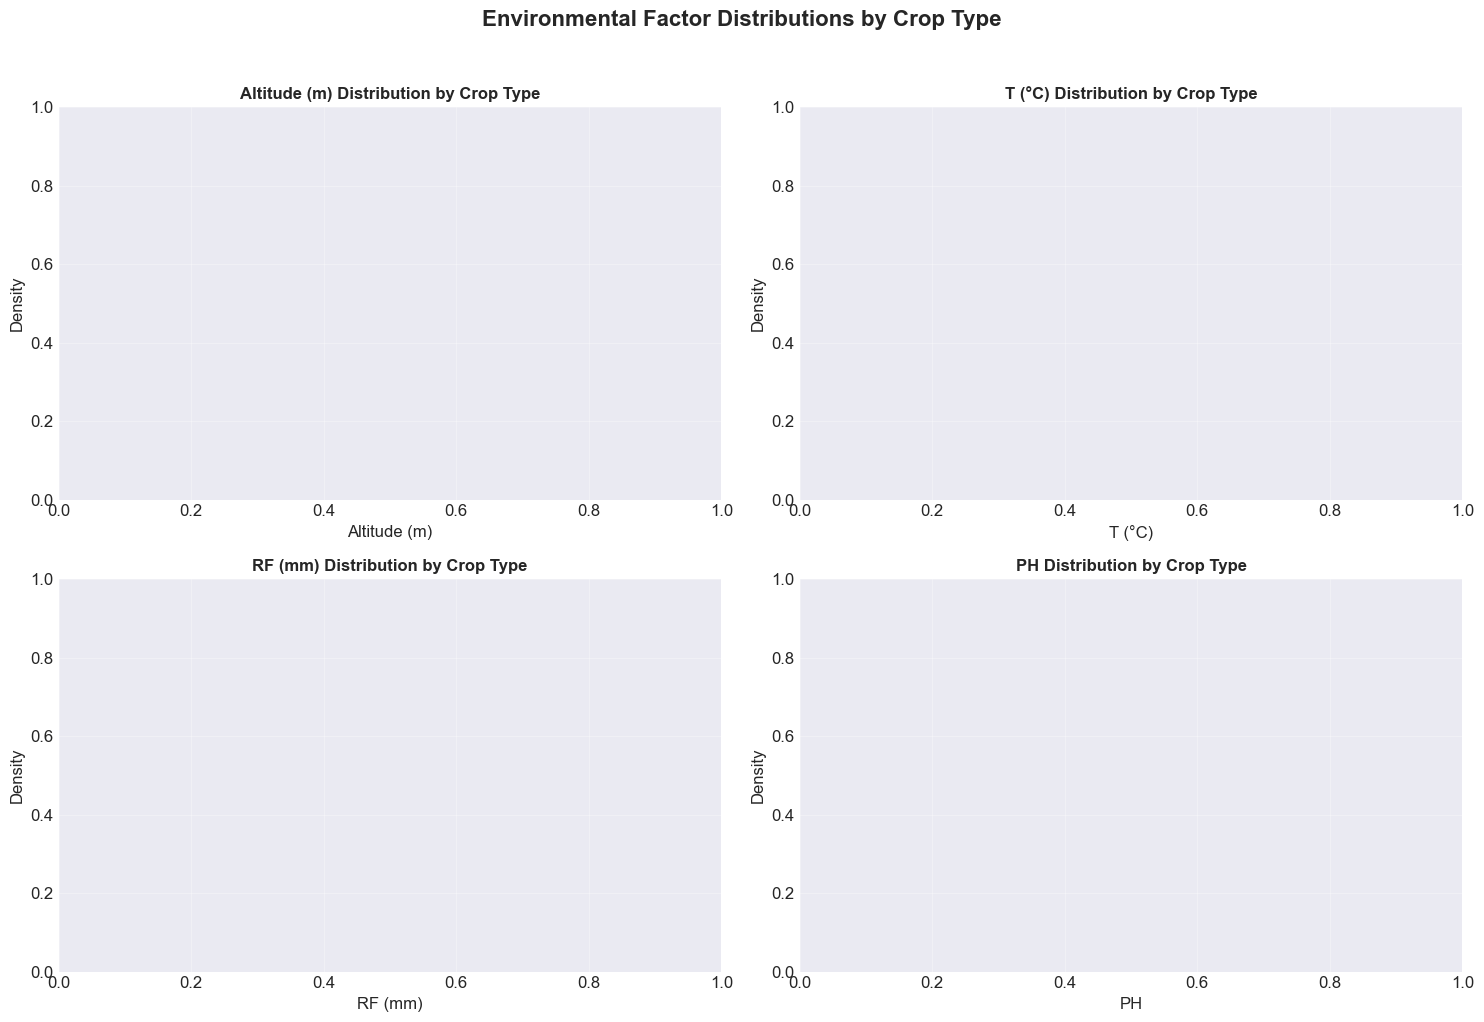


📋 Environmental Factor Statistics by Crop Type:

Altitude (m):
              mean     std      min      max
Crop Type                                   
Barley     2415.79  291.53  1500.51  3084.45
Maize      1545.63  481.28   140.58  2598.18
Sorghum    1559.20  379.03  1000.16  2699.57
Teff       1982.22  285.63  1202.60  2596.02
Wheat      1971.86  589.07   352.10  2897.71

T (°C):


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
print("="*60)
print(" ENVIRONMENTAL FACTOR ANALYSIS")
print("="*60)

# Create subplots for environmental factors
env_factors = ['Altitude (m)', 'T (°C)', 'RF (mm)', 'PH']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, factor in enumerate(env_factors):
    if factor in populated_df.columns:
        # KDE plot by crop type
        for crop in populated_df['Crop Type'].unique():
            subset = populated_df[populated_df['Crop Type'] == factor][factor].dropna()
            if len(subset) > 0:
                sns.kdeplot(data=subset, label=crop, ax=axes[idx], fill=True, alpha=0.3)
        
        axes[idx].set_title(f'{factor} Distribution by Crop Type', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(factor)
        axes[idx].set_ylabel('Density')
        axes[idx].legend(loc='upper right', fontsize=8)
        axes[idx].grid(True, alpha=0.3)

plt.suptitle('Environmental Factor Distributions by Crop Type', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Statistical summary of environmental factors
print("\n📋 Environmental Factor Statistics by Crop Type:")
for factor in env_factors:
    if factor in populated_df.columns:
        print(f"\n{factor}:")
        stats_by_crop = populated_df.groupby('Crop Type')[factor].agg(['mean', 'std', 'min', 'max'])
        print(stats_by_crop.round(2))

## Nutrient Analysis (N, P, K)

 NUTRIENT (NPK) ANALYSIS


TypeError: 'value' must be an instance of str or bytes, not a float

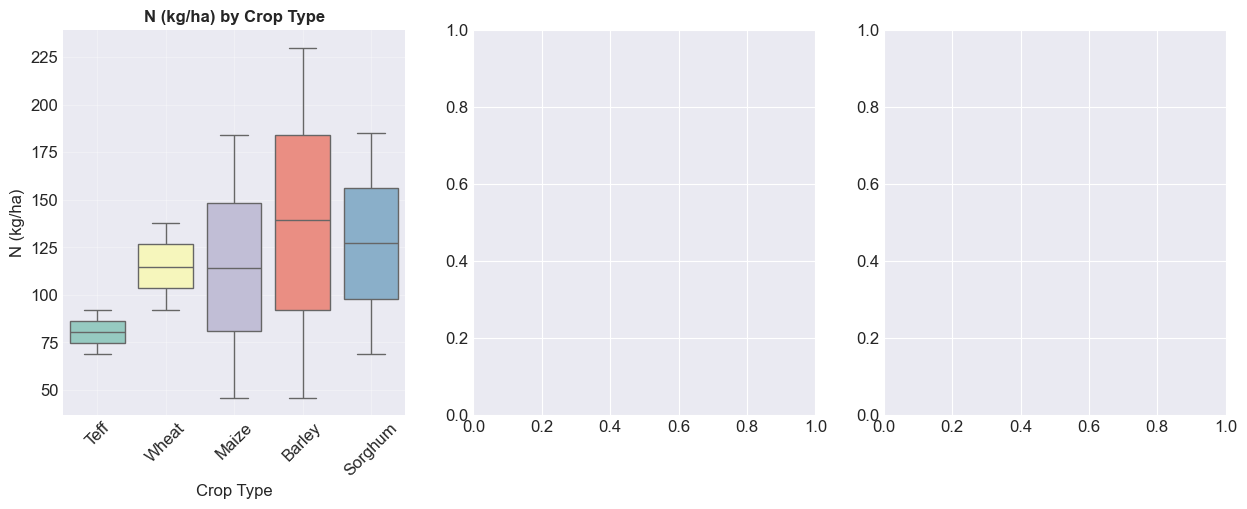

In [26]:
print("="*60)
print(" NUTRIENT (NPK) ANALYSIS")
print("="*60)

# NPK nutrients
npk_factors = ['N (kg/ha)', 'P (kg/ha)', 'K (kg/ha)']

# Check which NPK factors exist in data
existing_npk = [factor for factor in npk_factors if factor in populated_df.columns]

if existing_npk:
    # Create subplots
    fig, axes = plt.subplots(1, len(existing_npk), figsize=(5*len(existing_npk), 5))
    if len(existing_npk) == 1:
        axes = [axes]
    
    for idx, nutrient in enumerate(existing_npk):
        # Boxplot by crop type
        sns.boxplot(data=populated_df, x='Crop Type', y=nutrient, ax=axes[idx], palette='Set3')
        axes[idx].set_title(f'{nutrient} by Crop Type', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Crop Type')
        axes[idx].set_ylabel(nutrient)
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(True, alpha=0.3)
    
    plt.suptitle('Nutrient Requirements by Crop Type', fontsize=16, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()
    
    # NPK correlation
    npk_corr = populated_df[existing_npk].corr()
    print("\n NPK Correlation Matrix:")
    print(npk_corr.round(3))
    
    # Nutrient ratios if all three exist
    if len(existing_npk) == 3:
        populated_df['N:P Ratio'] = populated_df['N (kg/ha)'] / populated_df['P (kg/ha)'].replace(0, np.nan)
        populated_df['N:K Ratio'] = populated_df['N (kg/ha)'] / populated_df['K (kg/ha)'].replace(0, np.nan)
        
        print("\n📐 Average Nutrient Ratios by Crop Type:")
        ratios = populated_df.groupby('Crop Type')[['N:P Ratio', 'N:K Ratio']].mean().round(2)
        print(ratios)
else:
    print(" NPK columns not found in the dataset")

## save Populated Data

In [28]:
# Save the populated data
output_path = '../data/processed/cereal_populated_data.csv'
populator.save_synthetic_data(output_path)
print("="*60)
print(" DATA SAVED SUCCESSFULLY")
print("="*60)
print(f" Output path: {output_path}")
print(f" Total populated rows: {len(populated_df):,}")
print(f" File size: {os.path.getsize(output_path) / 1024**2:.2f} MB")


INFO:data_populator:Saving synthetic data to ../data/processed/cereal_populated_data.csv
INFO:data_populator:Save completed successfully


 DATA SAVED SUCCESSFULLY
 Output path: ../data/processed/cereal_populated_data.csv
 Total populated rows: 28,800
 File size: 4.71 MB


## Comprehensive Summary

In [29]:
print("="*70)
print(" FINAL EDA SUMMARY - POPULATED DATA")
print("="*70)

# Basic metrics
print(f"\n DATA VOLUME METRICS:")
print(f"  • Original dataset: {len(original_df):,} rows")
print(f"  • Populated dataset: {len(populated_df):,} rows")
print(f"  • Expansion factor: {len(populated_df)/len(original_df):.0f}x")
print(f"  • Columns in populated data: {len(populated_df.columns)}")

# Crop diversity
print(f"\n CROP DIVERSITY:")
print(f"  • Crop types: {populated_df['Crop Type'].nunique()}")
print(f"  • Crop species: {populated_df['Crop Species'].nunique()}")
print(f"  • Samples per crop type:")
for crop, count in populated_df['Crop Type'].value_counts().items():
    print(f"    - {crop}: {count:,} samples ({count/len(populated_df)*100:.1f}%)")

# Data quality
print(f"\n DATA QUALITY:")
print(f"  • Missing values: {populated_df.isnull().sum().sum()} total")
print(f"  • Duplicate rows: {populated_df.duplicated().sum()}")
print(f"  • Memory usage: {populated_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Key statistics
print(f"\n KEY STATISTICS (Populated Data):")
key_stats_cols = ['Yield (q/ha)', 'Altitude (m)', 'RF (mm)', 'T (°C)']
for col in key_stats_cols:
    if col in populated_df.columns:
        data = populated_df[col].dropna()
        print(f"  • {col}:")
        print(f"    Mean = {data.mean():.2f}, Std = {data.std():.2f}")
        print(f"    Range = {data.min():.2f} to {data.max():.2f}")
        print(f"    IQR = {data.quantile(0.25):.2f} - {data.quantile(0.75):.2f}")


 FINAL EDA SUMMARY - POPULATED DATA

 DATA VOLUME METRICS:
  • Original dataset: 288 rows
  • Populated dataset: 28,800 rows
  • Expansion factor: 100x
  • Columns in populated data: 12

 CROP DIVERSITY:
  • Crop types: 5
  • Crop species: 276
  • Samples per crop type:
    - Wheat: 9,500 samples (33.0%)
    - Sorghum: 5,400 samples (18.8%)
    - Maize: 5,100 samples (17.7%)
    - Barley: 4,500 samples (15.6%)
    - Teff: 4,300 samples (14.9%)

 DATA QUALITY:
  • Missing values: 0 total
  • Duplicate rows: 0
  • Memory usage: 6.26 MB

 KEY STATISTICS (Populated Data):
  • Yield (q/ha):


TypeError: unsupported operand type(s) for +: 'float' and 'str'